<a href="https://colab.research.google.com/github/Alam710/facial-emotion-recognition/blob/master/inputsize224x224_transfer_lerning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import sgd_experimental
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import sys, time

In [ ]:
img_width, img_height = 224, 224

In [ ]:
train_data_dir = '/content/drive/MyDrive/Tesis/CK_7_KELAS/train'
validation_data_dir = '/content/drive/MyDrive/Tesis/CK_7_KELAS/valid'
testing_dir = "/content/drive/MyDrive/Tesis/CK_7_KELAS/test"
nb_train_samples = 1044
nb_validation_samples = 132
epochs = 50
batch_size = 16

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Training Data Augmentation
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')


In [ ]:
testing_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

testing_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 128 images belonging to 7 classes.


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
  #  color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical')

Found 1000 images belonging to 7 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 128 images belonging to 7 classes.


In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding="same", input_shape=(img_width, img_height, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), padding="same", activation=tf.keras.activations.relu),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(84, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation=tf.keras.activations.softmax)
])


In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint
weightpath = "model"
checkpoints = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callback_list = [checkpoints]

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
# TensorBoard Callbacks
callbacks = TensorBoard(log_dir='./Graph')

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.99):
      print("\nAkurasi telah mencapai > 99%!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
def print_time_taken(start_time, end_time):
    secs_elapsed = end_time - start_time

    SECS_PER_MIN = 60
    SECS_PER_HR  = 60 * SECS_PER_MIN

    hrs_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_HR)
    mins_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_MIN)

    if hrs_elapsed > 0:
        print('Time taken: %d hrs %d mins %d secs' % (hrs_elapsed, mins_elapsed, secs_elapsed))
    elif mins_elapsed > 0:
        print('Time taken: %d mins %d secs' % (mins_elapsed, secs_elapsed))
    elif secs_elapsed > 1:
        print('Time taken: %d secs' % (secs_elapsed))
    else:
        print('Time taken - less than 1 sec')

In [ ]:
# train

import sys, time
start_time = time.time()
"""
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[callbacks])"""

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    # validation_steps=72 *0.15,
                    epochs=50,
                    verbose=2,
                    callbacks=[callbacks]
                    )
"""
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=100,
                              verbose=2)"""
end_time = time.time()
print_time_taken(start_time, end_time)

Epoch 1/50
63/63 - 358s - loss: 1.6374 - accuracy: 0.3980 - val_loss: 1.2062 - val_accuracy: 0.6328 - 358s/epoch - 6s/step
Epoch 2/50
63/63 - 16s - loss: 1.1481 - accuracy: 0.6230 - val_loss: 0.8631 - val_accuracy: 0.7422 - 16s/epoch - 253ms/step
Epoch 3/50
63/63 - 16s - loss: 0.8289 - accuracy: 0.7330 - val_loss: 0.5621 - val_accuracy: 0.8359 - 16s/epoch - 254ms/step
Epoch 4/50
63/63 - 16s - loss: 0.6549 - accuracy: 0.7760 - val_loss: 0.4599 - val_accuracy: 0.8672 - 16s/epoch - 257ms/step
Epoch 5/50
63/63 - 16s - loss: 0.5322 - accuracy: 0.8180 - val_loss: 0.2924 - val_accuracy: 0.9297 - 16s/epoch - 257ms/step
Epoch 6/50
63/63 - 16s - loss: 0.4939 - accuracy: 0.8340 - val_loss: 0.2042 - val_accuracy: 0.9531 - 16s/epoch - 256ms/step
Epoch 7/50
63/63 - 16s - loss: 0.4156 - accuracy: 0.8550 - val_loss: 0.2302 - val_accuracy: 0.9375 - 16s/epoch - 257ms/step
Epoch 8/50
63/63 - 16s - loss: 0.4000 - accuracy: 0.8510 - val_loss: 0.1834 - val_accuracy: 0.9531 - 16s/epoch - 259ms/step
Epoch 9/5

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.pb')
%cd

INFO:tensorflow:Assets written to: my_model.pb/assets
/root


In [ ]:
import os
import tarfile
def tardir(path, tar_name):
    with tarfile.open(tar_name, "w:gz") as tar_handle:
        for root, dirs, files in os.walk(path):
            for file in files:
                tar_handle.add(os.path.join(root, file))
tardir('root/my_model.pb', 'my_model.tar.gz')
%cd


/root


In [ ]:
nb_train_samples = 1044

In [ ]:
nb_validation_samples = 132

In [ ]:
steps = nb_validation_samples/1

In [ ]:
evaluate= model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print('Test accuracy = {:.2f}'.format(evaluate[1]*100)+'%')

Test accuracy = 99.22%


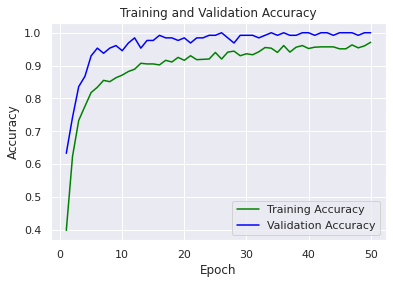

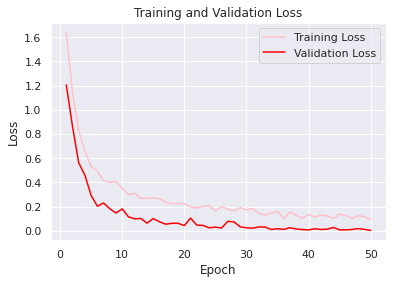

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(testing_generator)

8/8 [==============================] - 2s 239ms/step - loss: 0.0087 - accuracy: 0.9922


[0.008737052790820599, 0.9921875]

In [ ]:
model.save("/content/drive/MyDrive/model_save/model_save_input_ck+_7_kelas/224x224/99.22%.h5")

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/model_save/model_save_input_ck+_7_kelas/224x224/99.22%.h5")

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [ ]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_test, preds_probs)
class_names=['surprise', 'disgust', 'fear', 'happy', 'sad', 'neutral', 'angry']
# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_test, preds_probs, classes = class_names, title='Confusion matrix, without normalization')